# experiment simulation

## Explanation

We try to simulate brutally the experiment.

In [8]:
from numpy.random import poisson, normal
import numpy as np
import matplotlib.pyplot as plt

In [9]:
## defining the lorentian function
def lorentian(x, n_max, Gamma, x_resonance=0):
    return n_max*(Gamma**2/((x-x_resonance)**2+Gamma**2))

In [10]:
## n_max : height of the peack of the ideal lorentian. 
n_max = 8  

## g : FWHM of the ideal lorentian.
g = 1.7*780/1013-0.6

## N_measure : number of measurment
N_measures = 100

## f_std : standard deviation of the frequency gaussian noise.
f_std = 0.6

## n_max_std : standard deviation of the amplitude gaussian noise.
n_max_std = 0.01#n_max*(20/100)

## f0_vals : values of detuning to sample all the lorentian.
f0_vals = np.linspace(-10, 10, 200)

In [11]:
## will contain the Q and the <n> values respectively for each f0 in f0_vals.
Q = [] 
n_means = []  

for f0 in f0_vals:
    frequences = normal(f0,f_std,N_measures)
    n_maxes = normal(n_max ,n_max_std ,N_measures)

    measures = []
    for i in range(N_measures):
        measures.append(poisson(lorentian(frequences[i], n_maxes[i], g),1))
    
    mean=np.mean(measures)
    std=np.std(measures)
    Q.append((std**2)/mean-1)
    n_means.append(mean)

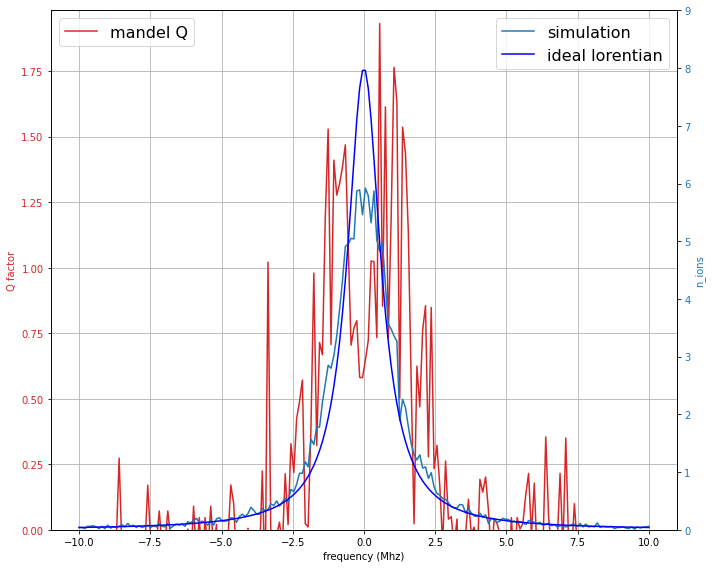

In [12]:
y=lorentian(f0_vals,n_max,g)

fig, ax1 = plt.subplots(figsize=(10, 8))

color = 'tab:red'
ax1.set_xlabel('frequency (Mhz)')
ax1.set_ylabel('Q factor', color=color)
ax1.plot(f0_vals, Q, "-", color=color, label="mandel Q")
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0,max(Q)+0.05])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('n_ions', color=color)  # we already handled the x-label with ax1
ax2.plot(f0_vals, n_means, "-", color=color, label="simulation")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,n_max+1])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.grid()

plt.plot(f0_vals, y, c="b", label="ideal lorentian")
ax1.legend(loc=2, fontsize=16)
ax2.legend(loc=1, fontsize=16)

plt.show()